In [1]:
import pandas as pd

sensus = {
    'tinggi' : [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita'
    ]
}
sensus_df= pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


In [3]:
Nama = 'Yurika Budiarti'
NPM = '41155050210047'

print('Nama:', Nama)
print('NPM:', NPM)

Nama: Yurika Budiarti
NPM: 41155050210047


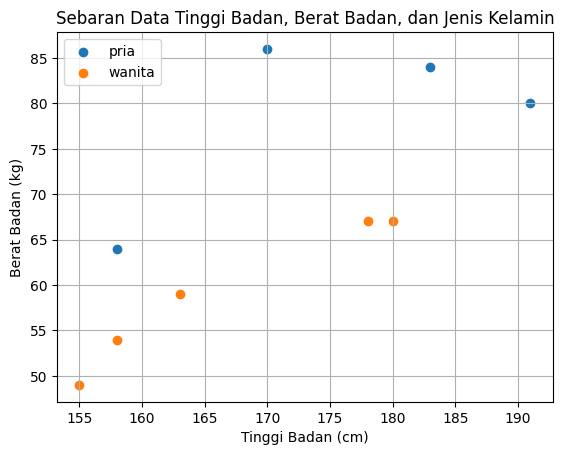

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter (d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

In [6]:
Nama = 'Yurika Budiarti'
NPM = '41155050210047'

print('Nama:', Nama)
print('NPM:', NPM)

Nama: Yurika Budiarti
NPM: 41155050210047


In [7]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [12]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')


y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [11]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


In [16]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train.ravel())


KNeighborsClassifier(n_neighbors=3)

In [17]:
Nama = 'Yurika Budiarti'
NPM = '41155050210047'

print('Nama:', Nama)
print('NPM:', NPM)

Nama: Yurika Budiarti
NPM: 41155050210047


In [18]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [19]:
y_new = model.predict(X_new)
y_new

array([1])

In [22]:
lb.inverse_transform(y_new)


array([1])

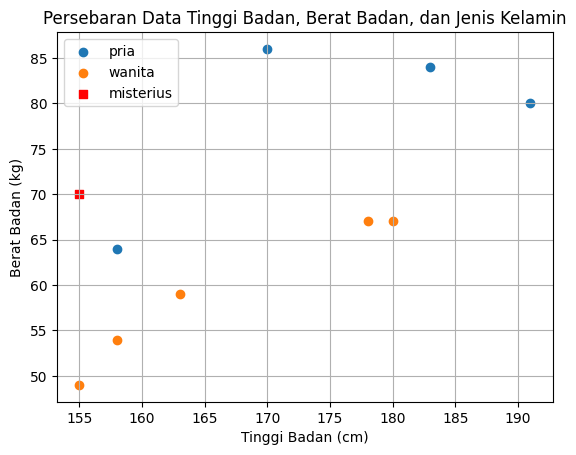

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
           berat_badan,
           marker='s',
           color='red',
           label='misterius')

plt.legend(loc='upper left')
plt.title('Persebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

In [24]:
Nama = 'Yurika Budiarti'
NPM = '41155050210047'

print('Nama:', Nama)
print('NPM:', NPM)

Nama: Yurika Budiarti
NPM: 41155050210047


In [28]:
misterius = np.array([tinggi_badan, berat_badan])
misterius



array([155,  70])

In [29]:
X_train


array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]])

In [30]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[np.float64(6.708203932499369),
 np.float64(21.93171219946131),
 np.float64(31.304951684997057),
 np.float64(37.36308338453881),
 np.float64(21.0),
 np.float64(13.601470508735444),
 np.float64(25.179356624028344),
 np.float64(16.278820596099706),
 np.float64(23.194827009486403)]

In [31]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


In [32]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 0 0]


In [33]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [34]:
Nama = 'Yurika Budiarti'
NPM = '41155050210047'

print('Nama:', Nama)
print('NPM:', NPM)

Nama: Yurika Budiarti
NPM: 41155050210047


In [35]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.25


In [36]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)
print(f'Precision: {prec}')

Precision: 0.0


In [37]:
Nama = 'Yurika Budiarti'
NPM = '41155050210047'

print('Nama:', Nama)
print('NPM:', NPM)

Nama: Yurika Budiarti
NPM: 41155050210047


In [39]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred, zero_division=1)
print(f'Recall: {rec}')


Recall: 1.0


In [40]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

F1-score: 0.0


In [41]:
Nama = 'Yurika Budiarti'
NPM = '41155050210047'

print('Nama:', Nama)
print('NPM:', NPM)

Nama: Yurika Budiarti
NPM: 41155050210047


In [43]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         0

    accuracy                           0.25         4
   macro avg       0.50      0.12      0.20         4
weighted avg       1.00      0.25      0.40         4



C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: Undefin

In [44]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: 0.0


In [45]:
Nama = 'Yurika Budiarti'
NPM = '41155050210047'

print('Nama:', Nama)
print('NPM:', NPM)

Nama: Yurika Budiarti
NPM: 41155050210047
